In [1]:
% matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
            'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize': (7.5, 7.5)}
plt.rcParams.update(pltparams)

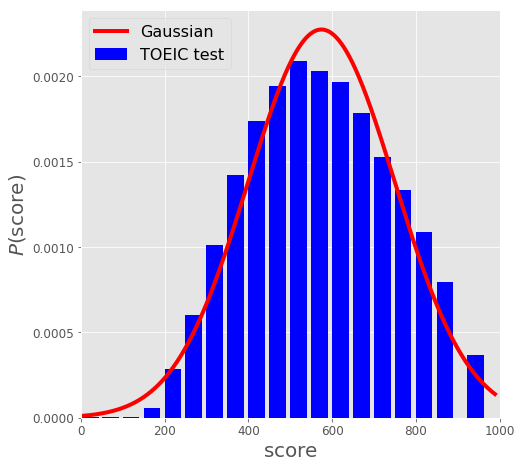

In [2]:
data=np.array([[895,990,4697],[845,894,5215],[795,844,7151],
               [745,794,8790],[695,744,10056],[645,694,11762],[595,644,12934],
               [545,594,13371],[495,544,13742],[445,494,12802],[395,444,11444],
               [345,394,9340],[295,344,6675],[245,294,3951],[195,244,1899],
               [145,194,376],[95,144,30],[45,94,18],[0,44,16],])

tot = 134269 # set total number of examinees
ave = 574.3  # set average
std = 175.4  # set standard deviation

x = np.arange(0,990,1) # create array of x from 0 to 1 with increment 0.01
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # create array of y as y=1

fig, ax = plt.subplots(subplot_kw={'xlabel':r'$\mathrm{score}$', 'ylabel':r'$P(\mathrm{score})$'})

ax.bar((data[:,0]+data[:,1])/2,data[:,2]/tot/(data[:,1]-data[:,0]),width=40,align='center',label=r'TOEIC test',color='b')
ax.plot(x,y,linewidth=4,color='r',label=r'Gaussian') # plot y vs. x with red line
ax.set_xlim(0,1000)    # set x-range
ax.legend(loc=2)       # set legends

plt.show()             # display plots

In [4]:
import pandas as pd # import pandas library as pd
from datetime import datetime
from pandas_datareader import data as pdr
from pandas_datareader import wb   as pwb

In [5]:
# Logarithmic return of price time series
def logreturn(Pt,tau=1):
    return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
# normalize data to have unit variance (<(x - <x>)^2> = 1)
def normalized(data):
    return (data/np.sqrt(np.var(data)))
# compute normalized probability distribution function
def pdf(data,bins=50):
    hist, edges = np.histogram(data[~np.isnan(data)], bins=bins, density=True) # remove NaNs and compute histogram (returns bar heights and bar edges)
    edges   = (edges[:-1] + edges[1:])/2.0 # get bar centers
    nonzero = hist > 0.0                   # only keep non-zero points 
    return edges[nonzero], hist[nonzero]

In [6]:
# define time interval
end_time   = datetime.now()
start_time = datetime(end_time.year - 30, end_time.month, end_time.day)
# get pandas data for Japanese and American stocks
toyota     = pdr.DataReader('7203','yahoo',start_time,end_time) 
mitsui     = pdr.DataReader('8031','yahoo',start_time,end_time)
mitsubishi = pdr.DataReader('8058','yahoo',start_time,end_time)
apple      = pdr.DataReader('AAPL','yahoo',start_time,end_time) 
msft       = pdr.DataReader('MSFT','yahoo',start_time,end_time)
hpq        = pdr.DataReader('HPQ', 'yahoo',start_time,end_time)
nikkei     = pdr.DataReader('^N225','yahoo',start_time,end_time)
sp500      = pdr.DataReader('^GSPC','yahoo',start_time,end_time)
toyota.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-28,6112.0,6129.0,6020.0,6035.0,6765800,6035.0
2017-05-01,6024.0,6062.0,6006.0,6042.0,3793600,6042.0
2017-05-02,6057.0,6143.0,6048.0,6143.0,5943200,6143.0
2017-05-03,6143.0,6143.0,6143.0,6143.0,0,6143.0
2017-05-04,6143.0,6143.0,6143.0,6143.0,0,6143.0


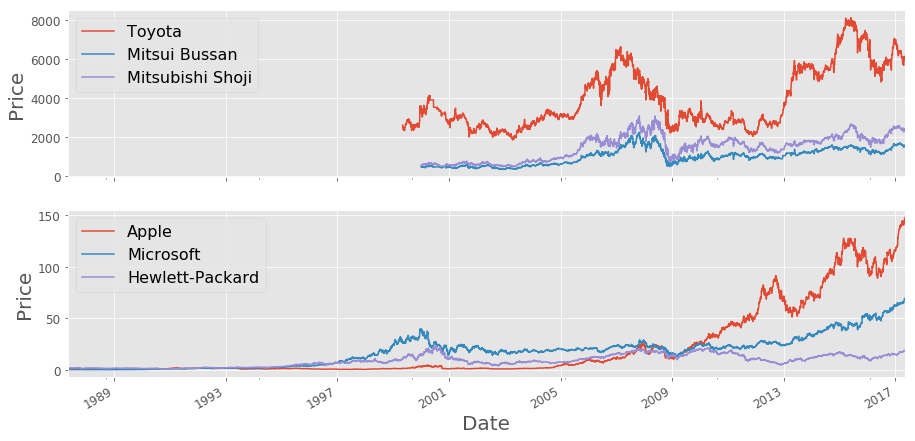

In [7]:
fig,[ax,bx]=plt.subplots(figsize=(15,7.5),nrows=2,sharex=True,subplot_kw={'xlabel':r'Date','ylabel':r'Price'})

for stock,lbl in zip([toyota,mitsui,mitsubishi],['Toyota','Mitsui Bussan','Mitsubishi Shoji']):
    stock['Adj Close'].plot(ax=ax,legend=True,label=lbl)

for stock,lbl in zip([apple,msft,hpq],['Apple','Microsoft','Hewlett-Packard']):
    stock['Adj Close'].plot(ax=bx,legend=True,label=lbl)

plt.show()

In [13]:
# add logarithmic return data to pandas DataFrame data using the 'Adjusted Close' stock price for each day
def computeReturn(data, name, tau):
    data[name]=pd.Series(normalized(logreturn(data['Adj Close'].values, tau)),index=data.index[:-tau])

#for stock in [toyota,mitsui,mitsubishi,nikkei,apple,msft,hpq,sp500]:
#    computeReturn(stock,'Return d1',1)

for stock in [toyota,mitsui,mitsubishi,nikkei,apple,msft,hpq,sp500]:
    computeReturn(stock,'Return d30',30)
    
for stock in [toyota,mitsui,mitsubishi,nikkei,apple,msft,hpq,sp500]:
    computeReturn(stock,'Return d90',90)
    
for stock in [toyota,mitsui,mitsubishi,nikkei,apple,msft,hpq,sp500]:
    computeReturn(stock,'Return d180',180)

toyota.tail()

,Open,High,Low,Close,Volume,Adj Close,Return d1,Return d30,Return d90,Return d180
Date,,,,,,,,,,
2017-04-28,6112.0,6129.0,6020.0,6035.0,6765800,6035.0,0.047454,NaN,NaN,NaN
2017-05-01,6024.0,6062.0,6006.0,6042.0,3793600,6042.0,0.678642,NaN,NaN,NaN
2017-05-02,6057.0,6143.0,6048.0,6143.0,5943200,6143.0,0.000000,NaN,NaN,NaN
2017-05-03,6143.0,6143.0,6143.0,6143.0,0,6143.0,0.000000,NaN,NaN,NaN
2017-05-04,6143.0,6143.0,6143.0,6143.0,0,6143.0,NaN,NaN,NaN,NaN


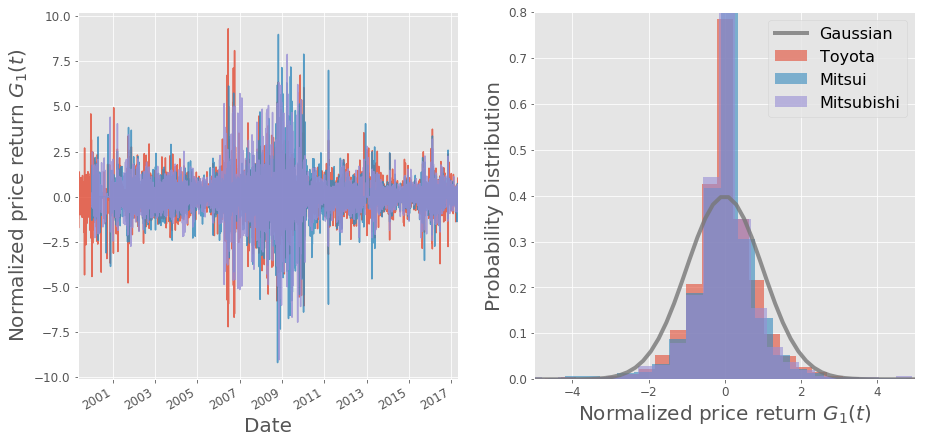

In [10]:
fig, [ax,bx] = plt.subplots(figsize=(15.0, 7.5),ncols=2)

for data,lbl in zip([toyota,mitsui,mitsubishi],['Toyota','Mitsui','Mitsubishi']):
    data['Return d1'].plot(ax=ax,alpha=0.8)
    data['Return d1'].hist(ax=bx,alpha=0.6,normed=True,bins=40,lw=0,label=lbl)

x = np.linspace(-5,5)

bx.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=4,alpha=0.8,label='Gaussian')
bx.legend()

ax.set_ylabel('Normalized price return $G_1(t)$')

bx.set_xlabel('Normalized price return $G_1(t)$')
bx.set_ylabel('Probability Distribution')
bx.set_xlim([-5,5])
bx.set_ylim([0,0.8])

plt.show()

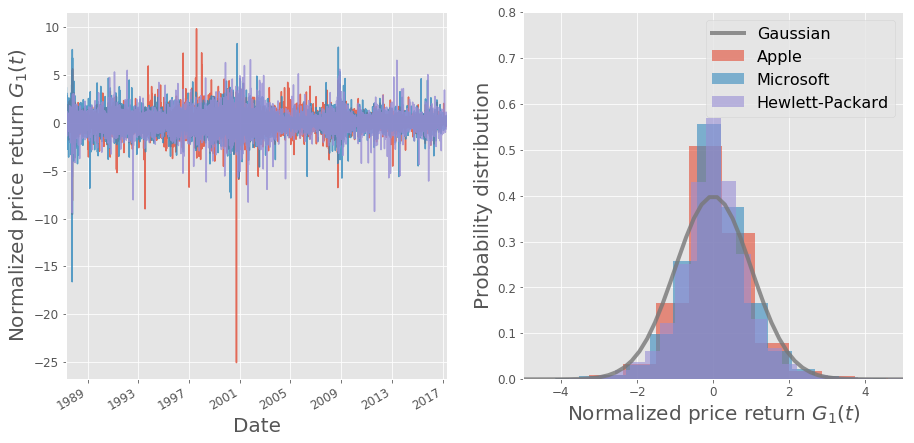

In [11]:
fig,[ax,bx]=plt.subplots(figsize=(15.0,7.5),ncols=2)

for data,lbl in zip([apple,msft,hpq],['Apple','Microsoft','Hewlett-Packard']):
    data['Return d1'].plot(ax=ax,alpha=0.8,label=lbl)
    data['Return d1'].hist(ax=bx,alpha=0.6,normed=True,bins=40,lw=0,label=lbl)

x = np.linspace(-5,5)

bx.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=4,alpha=0.8,label='Gaussian')
bx.legend()

ax.set_xlabel('Date')
ax.set_ylabel('Normalized price return $G_1(t)$')

bx.set_xlabel('Normalized price return $G_1(t)$')
bx.set_ylabel('Probability distribution')
bx.set_xlim([-5,5])
bx.set_ylim([0,0.8])

plt.show()

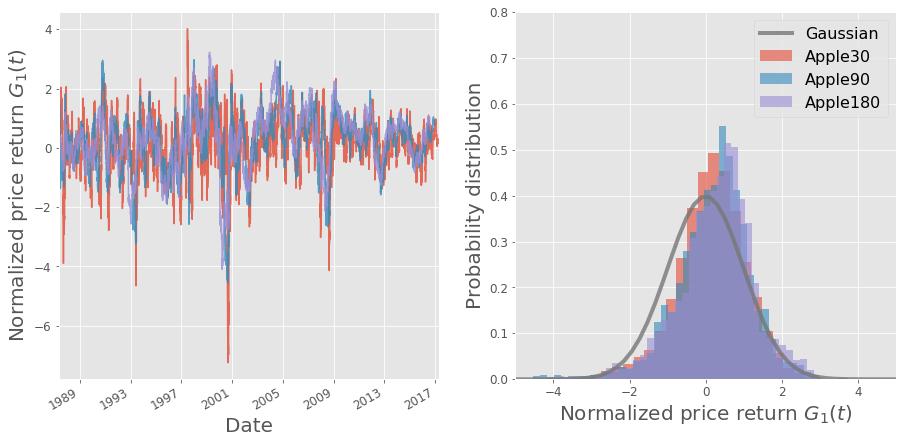

In [16]:
fig,[ax,bx]=plt.subplots(figsize=(15.0,7.5),ncols=2)

#for data,lbl in zip([apple,msft,hpq],['Apple','Microsoft','Hewlett-Packard']):
data = apple
lbl = 'Apple'

data['Return d30'].plot(ax=ax,alpha=0.8,label=lbl + '30')
data['Return d30'].hist(ax=bx,alpha=0.6,normed=True,bins=40,lw=0,label=lbl + '30')
data['Return d90'].plot(ax=ax,alpha=0.8,label=lbl + '90')
data['Return d90'].hist(ax=bx,alpha=0.6,normed=True,bins=40,lw=0,label=lbl + '90')
data['Return d180'].plot(ax=ax,alpha=0.8,label=lbl + '180')
data['Return d180'].hist(ax=bx,alpha=0.6,normed=True,bins=40,lw=0,label=lbl + '180')

x = np.linspace(-5,5)

bx.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=4,alpha=0.8,label='Gaussian')
bx.legend()

ax.set_xlabel('Date')
ax.set_ylabel('Normalized price return $G_1(t)$')

bx.set_xlabel('Normalized price return $G_1(t)$')
bx.set_ylabel('Probability distribution')
bx.set_xlim([-5,5])
bx.set_ylim([0,0.8])

plt.show()

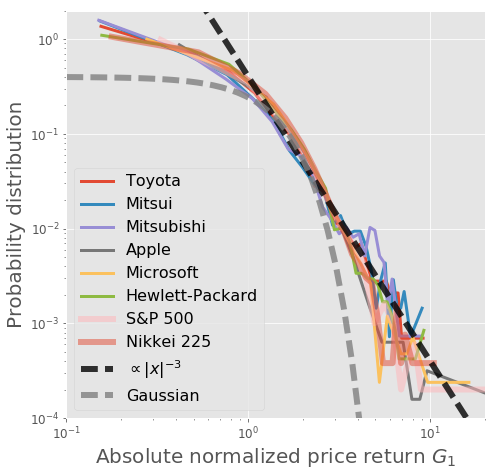

In [12]:
fig,ax=plt.subplots(subplot_kw={'xlabel':r'Absolute normalized price return $G_1$','ylabel':r'Probability distribution'})

# probability distribution for stocks
for stock,lbl in zip([toyota,mitsui,mitsubishi,apple,msft,hpq], 
        ['Toyota','Mitsui','Mitsubishi','Apple','Microsoft','Hewlett-Packard']):
    edges,hist=pdf(np.abs(stock['Return d1']),bins=30)
    ax.plot(edges,hist,label=lbl,lw=3)

# probability distribution for stock indices 
for stock,lbl in zip([sp500,nikkei],['S&P 500','Nikkei 225']):
    edges,hist=pdf(np.abs(stock['Return d1']),bins=30)
    ax.plot(edges,hist,label=lbl,lw=6,alpha=0.5)

# power law x^-3
x = np.logspace(-1, 1.2)

ax.plot(x,0.4*x**(-3),lw=6,ls='--',color='k',alpha=0.8,label=r'$\propto |x|^{-3}$')
ax.plot(x,np.abs(np.exp(-x**2/2)/np.sqrt(2*np.pi)),lw=6,ls='--',color='gray',alpha=0.8,label=r'Gaussian')
ax.semilogy()
ax.semilogx()
ax.set_ylim(1e-4, 2e0)
ax.set_xlim(1e-1, 2e1)
ax.legend(loc=3, fontsize=16, framealpha=0.8)

plt.show()

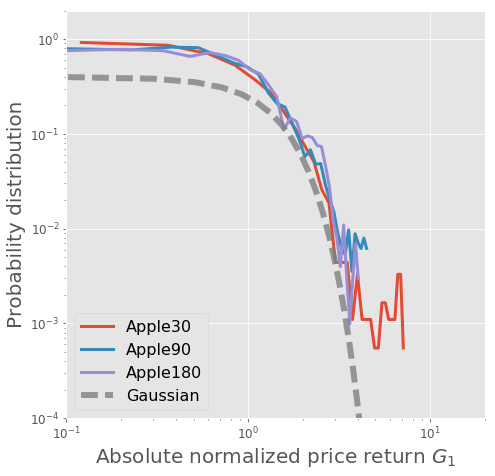

In [19]:
fig,ax=plt.subplots(subplot_kw={'xlabel':r'Absolute normalized price return $G_1$','ylabel':r'Probability distribution'})

# probability distribution for stocks
#for stock,lbl in zip([toyota,mitsui,mitsubishi,apple,msft,hpq], 
#        ['Toyota','Mitsui','Mitsubishi','Apple','Microsoft','Hewlett-Packard']):

stock=apple
lbl = 'Apple'

edges,hist=pdf(np.abs(stock['Return d30']),bins=30)
ax.plot(edges,hist,label=lbl + '30',lw=3)

edges,hist=pdf(np.abs(stock['Return d90']),bins=30)
ax.plot(edges,hist,label=lbl + '90',lw=3)

edges,hist=pdf(np.abs(stock['Return d180']),bins=30)
ax.plot(edges,hist,label=lbl + '180',lw=3)

ax.plot(x,np.abs(np.exp(-x**2/2)/np.sqrt(2*np.pi)),lw=6,ls='--',color='gray',alpha=0.8,label=r'Gaussian')

ax.semilogy()
ax.semilogx()

ax.set_ylim(1e-4, 2e0)
ax.set_xlim(1e-1, 2e1)
ax.legend(loc=3, fontsize=16, framealpha=0.8)

plt.show()